In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [41]:
class regresion_lineal:   
    def __init__(self,epoch, error_int, α ):
        
        #############################################
        ## Se carga la informacion en formato .npy ##
        #############################################   
        path = "C:\\Users\\Marcela Ambrosio\\OneDrive\\Documentos\\Galileo\\Ciencia de Datos en python\\Proyecto Final\\proyecto_data\\"
        filename = "proyecto_training_data.npy"
        self.data_array = np.load(path+filename)

        #####################################################        
        ## Se crean los dataset de entrenamiento y pruebas ##
        #####################################################
        self.entrenamiento_x, self.prueba_x, self.entrenamiento_y, self.prueba_y = train_test_split(self.data_array[:,2], self.data_array[:,0], test_size = 0.20, shuffle = False)
        
        ## Se divididen los valores de los arreglos ya que de lo contrario da error por desbordamiento.
        self.entrenamiento_x = np.reshape(self.entrenamiento_x, (-1, 1)) / 1000
        self.entrenamiento_y = np.reshape(self.entrenamiento_y, (-1, 1)) / 1000        
        
        self.prueba_x = np.reshape(self.prueba_x, (-1, 1)) / 1000
        self.prueba_y = np.reshape(self.prueba_y, (-1, 1)) / 1000

        ######################################################################
        ## Se ejecuta el analisis exploratorio para el set de entrenamiento ##
        ######################################################################
        print('Análisis Exploratorio Set de Entrenamiento')
        self.analisis_exploratorio(self.entrenamiento_x)
 
        #####################################
        ## Se grafican todas las variables ##
        #####################################
        self.graficaVariable(self.entrenamiento_x, self.entrenamiento_y, self.prueba_x, self.prueba_y)

        ##############################################
        ## Se calcula el coeficiente de correlacion ##
        ##############################################
        self.comparaVariables(self.entrenamiento_x, self.entrenamiento_y)
 
        #################################################       
        ## Se genera regresion                         ##
        #regresion(self, x, y, epoch, error_int, lrate)##
        #################################################
        
        error,betas = self.regresion(self.entrenamiento_x, self.entrenamiento_y, epoch, error_int, α)
        self.errorintime(error)
            
#####################################################################################################################
#####################################################################################################################
    def errorintime(self,error): #grafica cambio de error en el tiempo      
        plt.figure()
        plt.title("Error en el Tiempo")
        plt.xlabel("Iteraciones")
        plt.ylabel("Error")   
        plt.plot(error,color="red")


    def regresion(self, x, y, epoch, error_int, α): #preparacion de informacion para las iteraciones
        betas = [ [np.random.random()], [np.random.random()]]
        self.n = len(x)       
        self.x_mod =  np.hstack([x,np.ones_like(x)])

        
        #ejecutamos las iteraciones
        iteracion = 1
        intervalo_error = error_int
        errArray=[]
        modeloArray=[]
        
        while iteracion <= epoch:
            ###Inicializo arreglos
            predicciony=[]            
            errory=[]           
            gradienteError=[]    
                        
            ##################
            ## Prediccion Y ##
            ##################
            predicY = self.x_mod.dot(betas)                   

            ######################
            ## Error; gradiente ##
            ######################
            err = np.sum(np.square(( self.x_mod.dot(betas) - y))) / (2 * self.n) 
            gradienteb0 = np.sum(( self.x_mod.dot(betas) - y)) / self.n
            gradienteb1 = (np.sum(np.transpose(( self.x_mod.dot(betas) - y)) * (np.transpose(np.transpose(self.x_mod)[1]))) / (self.n))
            
            ########################            
            ## Recalculamos Betas ##
            ########################
            
            betas[0][0] = betas[0][0] - α * gradienteb0
            betas[1][0] = betas[1][0] - α * gradienteb1

            if (iteracion == intervalo_error):
                print("Iteracion:",iteracion,', Error:',err)
                intervalo_error +=error_int        
            
            #almacenamos error por iteracion
            errArray.append([iteracion,err])
            modeloArray.append([iteracion,betas[0][0],betas[1][0]])
            
            iteracion +=1          
            
        return(errArray,modeloArray)


    def comparaVariables(self, ex, ey):
        coeficiente = self.coeficienteCorrelacion(ex,ey)
        plt.figure()
        plt.title("Coeficiente Correlacion "+str(coeficiente))
        plt.xlabel('Variable X')
        plt.ylabel('Variable Y')                
        plt.scatter(ex,ey)
                    
    def analisis_exploratorio(self,data_array):        
        print("Media: ",self.media(data_array))
        print("Maximo: ",self.numeroMaximo(data_array))
        print("Minimo: ",self.numeroMinimo(data_array))
        print("Rango: ",self.rango(data_array))
        print("Desviacion: ",self.desviacionEstandar(data_array))

    def media(self, data_array):
        return np.median(data_array,axis=0)
    
    def numeroMaximo(self,data_array):
        return np.max(data_array,axis=0)
    
    def numeroMinimo(self,data_array):
        return np.min(data_array,axis=0)
    
    def rango(self,data_array):
        return np.ptp(data_array,axis=0)
    
    def desviacionEstandar(self,data_array):
        return np.std(data_array,axis=0)     

    def graficaVariable(self, ex, ey, px, py):    
        fig, axs = plt.subplots(2, 2, figsize=(7, 7))
        plt.title('Variables')
        sns.distplot(ex, label= "Entrenamiento X", color="skyblue", kde=True, ax=axs[0, 0])
        sns.distplot(ey, label= "Entrenamiento Y", color="olive",kde=True, ax=axs[0, 1])
        sns.distplot(px, label= "Entrenamiento X", color="gold", kde=True, ax=axs[1, 0])
        sns.distplot(py, label= "Entrenamiento Y", color="red",kde=True, ax=axs[1, 1])        
        plt.legend()
        plt.show()

    def coeficienteCorrelacion(self, dfx, dfy): #Se calculan coeficiente de correlacion numpy
        coeficiente = np.corrcoef(dfx,dfy,rowvar=False)[1,0]
        return coeficiente        

Análisis Exploratorio Set de Entrenamiento
Media:  [1.086]
Maximo:  [3.228]
Minimo:  [0.334]
Rango:  [2.894]
Desviacion:  [0.37362033]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

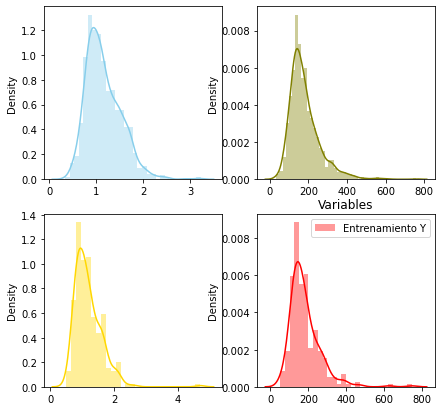

Iteracion: 300 , Error: 2073.367646231625
Iteracion: 600 , Error: 2073.367646231625
Iteracion: 900 , Error: 2073.367646231625
Iteracion: 1200 , Error: 2073.367646231625
Iteracion: 1500 , Error: 2073.367646231625
Iteracion: 1800 , Error: 2073.367646231625
Iteracion: 2100 , Error: 2073.367646231625
Iteracion: 2400 , Error: 2073.367646231625
Iteracion: 2700 , Error: 2073.367646231625
Iteracion: 3000 , Error: 2073.367646231625
Iteracion: 3300 , Error: 2073.367646231625
Iteracion: 3600 , Error: 2073.367646231625
Iteracion: 3900 , Error: 2073.367646231625
Iteracion: 4200 , Error: 2073.367646231625
Iteracion: 4500 , Error: 2073.367646231625
Iteracion: 4800 , Error: 2073.367646231625
Iteracion: 5100 , Error: 2073.367646231625
Iteracion: 5400 , Error: 2073.367646231625
Iteracion: 5700 , Error: 2073.367646231625
Iteracion: 6000 , Error: 2073.367646231625
Iteracion: 6300 , Error: 2073.367646231625
Iteracion: 6600 , Error: 2073.367646231625
Iteracion: 6900 , Error: 2073.367646231625
Iteracion: 720

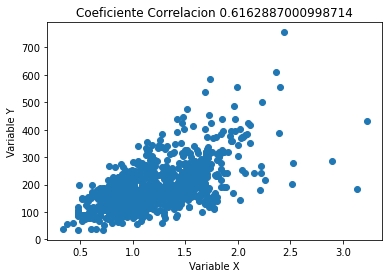

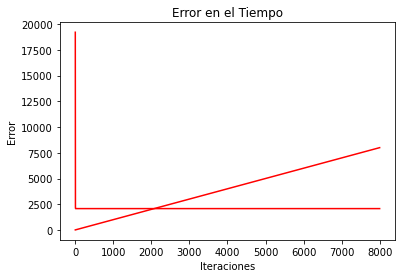

In [42]:
pryfinal = regresion_lineal(8000,300,0.7)
